In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/praktikum_ML/praktikum04/data/calonpembelimobil.csv')

df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Memiliki_Mobil'].unique()

array([0, 1, 2, 4, 3])

In [ ]:
df['Penghasilan'].unique()

array([240, 100, 250, 130, 237, 280, 150, 143, 200, 174, 147, 196, 120,
       230, 350, 172, 160, 260, 238, 400, 158, 236, 202, 140, 165, 224,
       203, 194, 220, 125, 162, 270,  95, 187, 235, 122, 339, 199, 175,
       261, 139, 195, 300, 233, 216, 179, 186, 297, 103, 390,  98, 190,
       135, 322, 159, 161, 301, 450, 223, 102, 136, 288, 170, 290, 377,
       133, 129, 324, 207, 193, 277, 222, 173, 169, 251, 128, 146, 177,
       248, 168, 137, 198, 225, 178, 239, 181, 490, 431, 163, 206, 132,
       204, 166, 320, 141, 289, 460, 266, 155, 305, 180, 340, 215, 420,
       412, 217, 391, 352, 325, 247, 370, 191, 332, 378, 281, 241, 401,
       314, 416, 253, 440, 226, 316, 358, 249, 447, 395, 197, 242, 284,
       427, 394, 308, 153, 345, 152, 131, 183, 227, 309, 338, 157, 448,
       428, 307, 328, 396, 276, 205, 318, 439, 398, 432, 375, 182, 415,
       148, 368, 231, 265, 188, 219, 212, 254, 228, 221, 335, 274, 176,
       315, 359, 282, 389, 373, 388, 171, 263, 346, 425, 434, 14

In [ ]:
df['Punya_Mobil_bin'] = (df['Memiliki_Mobil'] > 0).astype(int)
df['Penghasilan_bin'] = (df['Penghasilan'] >= 200).astype(int)

print("Distribusi Punya_Mobil_bin:\n", df['Punya_Mobil_bin'].value_counts())
print("\nDistribusi Penghasilan_bin:\n", df['Penghasilan_bin'].value_counts())

Distribusi Punya_Mobil_bin:
 Punya_Mobil_bin
1    662
0    338
Name: count, dtype: int64

Distribusi Penghasilan_bin:
 Penghasilan_bin
1    704
0    296
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Punya_Mobil_bin,Penghasilan_bin
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614,0.013834,0.181586
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127,0.066566,0.133258
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584,0.075906,0.109900
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,0.044757,-0.068502
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005,0.849184,0.133429
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930,0.116828,0.744497
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,0.109451,0.778866
Punya_Mobil_bin,0.013834,0.066566,0.075906,0.044757,0.849184,0.116828,0.109451,1.000000,0.152603
Penghasilan_bin,0.181586,0.133258,0.109900,-0.068502,0.133429,0.744497,0.778866,0.152603,1.000000


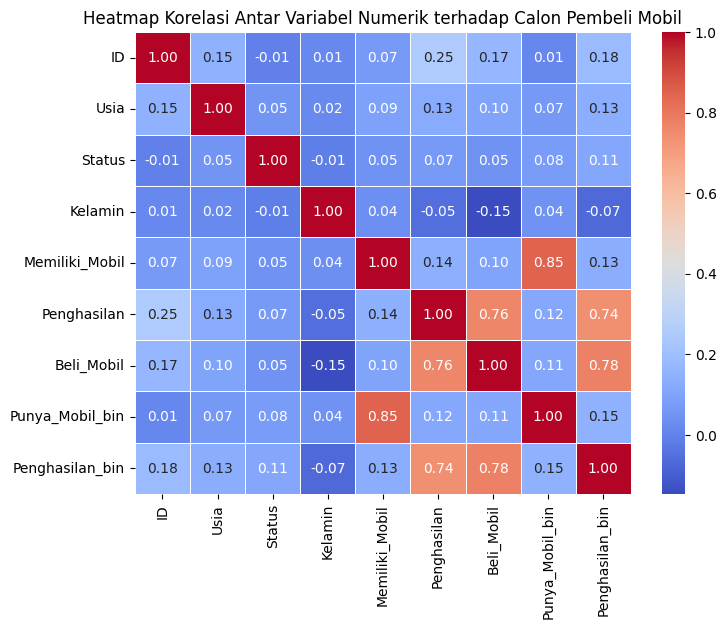

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Calon Pembeli Mobil', fontsize=12)
plt.show()

In [ ]:
feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Status', 'Kelamin', 'Memiliki_Mobil']

use_cols = feature_num + feature_bin + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

x = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (1000, 5)
y shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )
print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 5)
Data uji: (200, 5)


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik
print(f"Akurasi     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision   : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall      : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score    : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC     : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi     : 0.9300
Precision   : 0.9829
Recall      : 0.9055
F1-Score    : 0.9426
ROC-AUC     : 0.9769


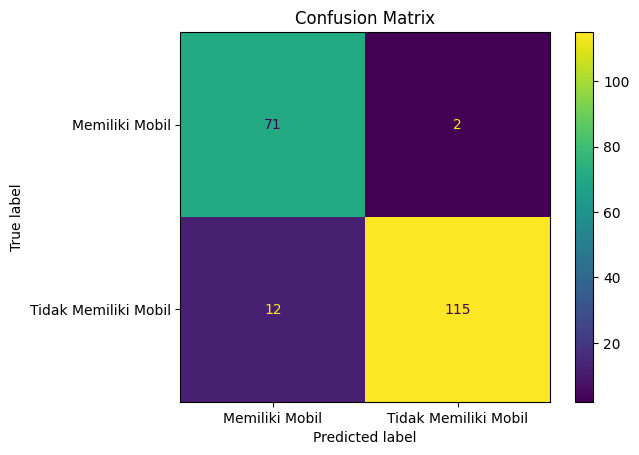

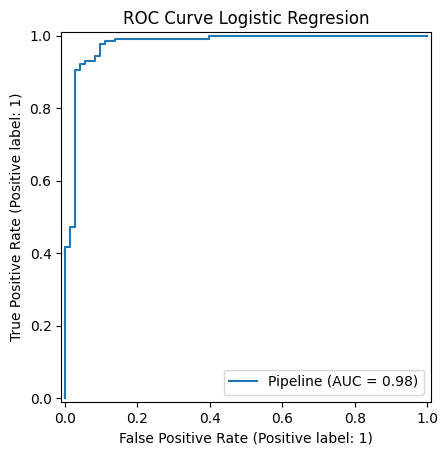

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Memiliki Mobil','Tidak Memiliki Mobil']
                       ).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve Logistic Regresion')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Memiliki Mobil(0)','Memiliki Mobil(1)']))

                         precision    recall  f1-score   support

Tidak Memiliki Mobil(0)       0.86      0.97      0.91        73
      Memiliki Mobil(1)       0.98      0.91      0.94       127

               accuracy                           0.93       200
              macro avg       0.92      0.94      0.93       200
           weighted avg       0.94      0.93      0.93       200



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Memiliki Mobil (0)', 'Memiliki Mobil (1)']))

                          precision    recall  f1-score   support

Tidak Memiliki Mobil (0)       0.86      0.97      0.91        73
      Memiliki Mobil (1)       0.98      0.91      0.94       127

                accuracy                           0.93       200
               macro avg       0.92      0.94      0.93       200
            weighted avg       0.94      0.93      0.93       200



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x, y, cv=5)

print("skor tiap fold:", scores)
print("rata-rata skor:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
rata-rata skor: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [ ]:
feature_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values(by='Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Penghasilan,4.550296,94.660404
4,Memiliki_Mobil,0.094958,1.099613
0,Usia,-0.046660,0.954412
2,Status,-0.124292,0.883122
3,Kelamin,-1.130837,0.322763


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Misal fitur dan target-nya
X = df[['Penghasilan', 'Memiliki_Mobil', 'Usia', 'Status', 'Kelamin']]
y = df['Beli_Mobil']   # pastikan ini nama kolom target kamu

# Bagi data jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model
clf = LogisticRegression()

# Latih model
clf.fit(X_train, y_train)


LogisticRegression()

In [ ]:
import pandas as pd

data_baru = pd.DataFrame({
    'Penghasilan': [250, 120],  # pendapatan dalam satuan yang sama kayak dataset aslinya
    'Memiliki_Mobil': [0, 1],   # 0 = belum punya, 1 = sudah punya
    'Usia': [30, 45],           # umur calon pembeli
    'Status': [0, 1],           # 0 = single, 1 = menikah
    'Kelamin': [1, 0]           # 1 = laki-laki, 0 = perempuan
})

# Prediksi pakai model logistic regression
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# Gabungkan hasil prediksi dan probabilitas ke tabel
hasil = data_baru.copy()
hasil['Prob_BeliMobil'] = prob
hasil['Pred(0=Tidak, 1=Ya)'] = pred

display(hasil)

,Penghasilan,Memiliki_Mobil,Usia,Status,Kelamin,Prob_BeliMobil,"Pred(0=Tidak, 1=Ya)"
0,250,0,30,0,1,0.834318,1
1,120,1,45,1,0,0.003824,0
